#数据集 Wine Reviews

#1数据可视化与摘要

##1.1数据摘要
在数据集Wine Reviews中，winemag-data_first150k文件中，共有10个属性，其中标称属性有：country、description、designation、province、region、region_2、variety、winery；数值属性有：points、price。

   对于标称属性，将每个属性的频数按照从大到小排序，因为每个属性中的类别较多，我们在此取标称属性频数较大的前5项作为展示。输出如下所示，每列属性的频数统计输出为一个列表，其中列表的每一项为属性对应的值和该值对应的频数，按照频数从大到小排序。从输出中我们可以看到每个属性中频数较高的值，其中有的属性有许多空值。

In [39]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data = wine_data.values
print('属性的值和频数如下所示：')
for i in range(wine_data.shape[1]):  # 对所有列进行频数的统计
    counter = Counter(wine_data[:, i])
    print(counter.most_common(5))  # 取前5项

属性的值和频数如下所示：
[('US', 62397), ('Italy', 23478), ('France', 21098), ('Spain', 8268), ('Chile', 5816)]
[('92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite of alcohol. The structure is soft, generous, opulent.', 6), ("86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could be delicious, with its lovely dry finish, but that's for the future.", 6), ('Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.', 6), ('A little bit funky and unsettled when you pop the screwcap, but soon it finds its floral, blueberry base. Remains superficial and sweet in the mouth, with candied flavors, vanilla and mild oak. Highly regular; could use more concentration and density.', 6), ("Gibilmoro, a pure expression of Nero d'A

   对于数值属性，points的五数概括为80、86、88、90、100，缺失值的个数为0；price的五数概括为33.13、36.32、4.00、16.00、24.00、40.00、2300.00，缺失值的个数为13695。

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
print(wine_data.describe())  # 五数概括、有效个数、平均值等

              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000


##1.2数据可视化
   使用盒图和直方图进行数据的可视化。因为属性较多，此处我们以属性points和price为例进行分析。
   对于属性points，盒图和直方图如下所示，可以看到，存在离群点，并且大部分数据分布在80~90之间。

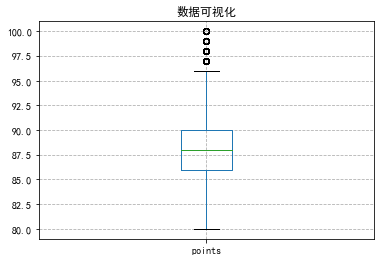

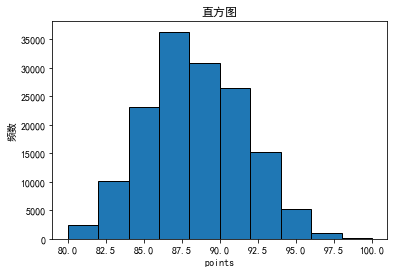

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data['points'].plot.box(title="数据可视化")
plt.grid(linestyle="--")
plt.show()
plt.hist(x=wine_data['points'], bins=10, edgecolor='black')
plt.xlabel('points')
plt.ylabel('频数')
plt.title('直方图')
plt.show()

   对于属性price，盒图如下所示，可以看到，存在较多离群点；

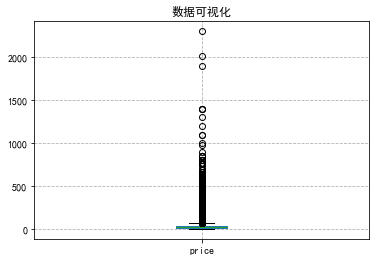

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data['price'].plot.box(title="数据可视化")
plt.grid(linestyle="--")
plt.show()

属性price中存在缺失值，直方图如下所示，列出了price中频数最高的前10项。

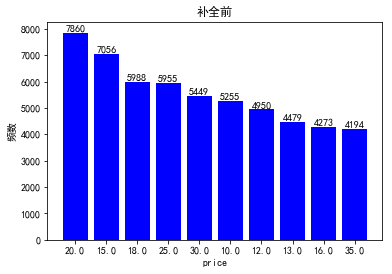

In [12]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig, ax = plt.subplots()
num_list = [7860, 7056, 5988, 5955, 5449, 5255, 4950, 4479, 4273, 4194]
name_list = ['20.0', '15.0', '18.0', '25.0', '30.0', '10.0', '12.0', '13.0', '16.0', '35.0']
b = ax.bar(name_list, num_list)
plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
for a, b in zip(name_list, num_list):
    ax.text(a, b + 1, b, ha='center', va='bottom')
plt.title('补全前')
plt.xlabel('price')
plt.ylabel('频数')
plt.show()


#2数据缺失的处理
#2.1剔除缺失值
将存在缺失值的行进行剔除，结果如下所示，剔除后仅剩余39241行，说明有大量的数据行中存在缺失值。
剔除缺失值后，以属性price的频数最大的前10项的直方图为例，可以看到，各个值的频数都有了明显的减少，并且排序也发生了明显变化。

剔除后总数据量：39241


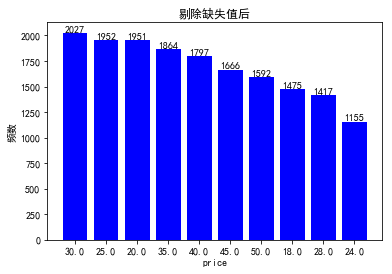

In [37]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'

def draw(data):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, 4])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('剔除缺失值后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
    
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_drop = wine_data.dropna()  # 将缺失值所在行剔除
print('剔除后总数据量：'+str(wine_drop.shape[0]))
draw(wine_drop)

##2.2最高频率值填补
对于存在缺失值的属性，使用该属性中频率最高的值进行填补。
该数据集中共有10个属性，首先确定每个属性的频率最高的值。读取数据集，遍历数据集的每个属性，根据属性的值的频数进行排序，最大频数即为最大频率，在遍历过程中，如果频数最高的值为缺失值，那么取下一个频数最高的值。最终将10个属性的最高频率的值存储在列表中。
接下来将每个属性的缺失值替换为该属性频率最高的值。
补全后以points和price属性为例可以看到，有效行数均为150930行，和数据集中的总行数相同。
以最高频率值填补后，以属性price的频数最大的前10项的直方图为例，可以看到，price为20的频数大量增加，其余值的频数不变。

                   3              4
count  150930.000000  150930.000000
mean       87.888418      31.939966
std         3.222392      34.840211
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      22.000000
75%        90.000000      38.000000
max       100.000000    2300.000000


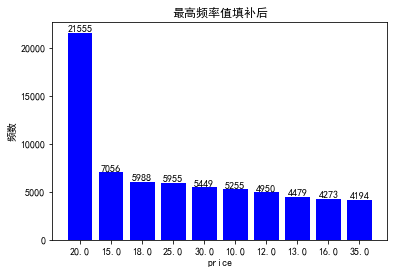

In [18]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'

def draw(data):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, 4])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('最高频率值填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
    
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data = wine_data.values
max_time = []  # 每个属性最大频数的值
# 确定每个属性最大频数的值
for cl in range(wine_data.shape[1]):
    counter = Counter(wine_data[:, cl])
    counter = counter.most_common()  # 排序，返回类型为list，list的每个元素为内容和频数
    if counter[0][0] == counter[0][0]:  # 如果最大频数不为空值
        max_time.append(counter[0][0])
    else:  # 如果最大频数为空值
        max_time.append(counter[1][0])
# 对每个属性的空值进行替换
wine_max = pd.DataFrame(wine_data)
for cl in range(wine_data.shape[1]):
    wine_max[cl] = wine_max[cl].fillna(max_time[cl])
print(wine_max.describe())
draw(wine_max)

##2.3通过属性的相关关系来填补缺失值
以price属性为例，通过属性的相关关系来填补缺失值，绘制填补后频数最大的前10项的直方图，可以看到，缺失值填补后的值为33.13，并且频数较大。

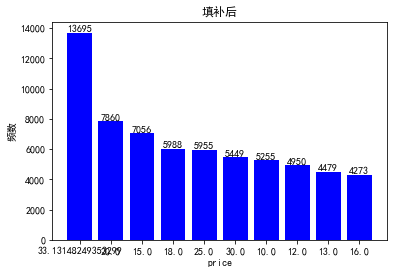

In [46]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'

def draw(data, cl):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()

# 通过属性的相关关系来填补缺失值
def att_rel(path):
    wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
    wine_data = wine_data.values
    im = Imputer(missing_values='NaN', strategy='mean', axis=0)
    att_data = im.fit_transform(wine_data[:, 4].reshape(-1, 1))
    draw(pd.DataFrame(att_data), 0)
    
att_rel(path)

##2.4通过数据对象之间的相似性来填补缺失值
以price属性为例，通过数据对象之间的相似性来填补缺失值，使用IterativeImputer方法实现，绘制填补后频数最大的前10项的直方图，如下所示。

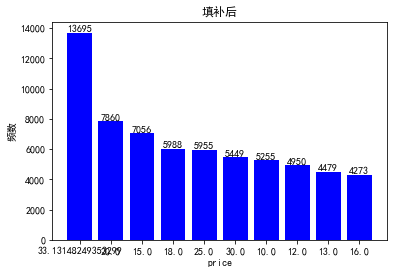

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/wine-reviews/winemag-data_first150k.csv'

def draw(data, cl):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
# 通过数据对象之间的相似性来填补缺失值
def obj_sim(path):
    wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
    wine_data = wine_data.values
    # t = BiScaler().fit_transform(wine_data[:, 4].reshape(-1, 1))
    # obj_data = SoftImpute().fit_transform(t)
    obj_data = IterativeImputer().fit_transform(wine_data[:, 4].reshape(-1, 1))
    draw(pd.DataFrame(obj_data), 0)

obj_sim(path)

#数据集Oakland Crime Statistics 2011 to 2016

#3数据可视化与摘要

##3.1数据摘要
在数据集Oakland Crime Statistics 2011 to 2016中，有2011年到2016年的数据，每年的数据为一个csv文件，此处我们以2016年的数据为例进行数据预处理。文件名为records-for-2015.csv，共有10个属性，其中标称属性有：Agency、Create Time、Location、Area Id、Beat、Incident Type Id、Incident Type Description、Event Number、Closed Time；数值属性有：Priority。
对于标称属性，将每个属性的频数按照从大到小排序，因为每个属性中的类别较多，在此取标称属性频数较大的前5项作为展示。输出如下所示，每列属性的频数统计输出为一个列表，其中列表的每一项为属性对应的值和该值对应的频数，按照频数从大到小排序。从输出中我们可以看到每个属性中频数较高的值，其中有的属性有许多空值。

In [44]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'
data = pd.read_csv(path, header=0,  engine='python', encoding='utf-8')
data = data.values
print('属性的值和频数如下所示：')
for i in range(data.shape[1]):  # 对所有列进行频数的统计
    counter = Counter(data[:, i])
    print(counter.most_common(5))  # 取前5项

属性的值和频数如下所示：
[('OP', 110827), (nan, 1)]
[('2016-05-06T11:21:13.000', 3), ('2016-01-01T11:56:04.000', 2), ('2016-01-05T15:14:57.000', 2), ('2016-01-06T15:35:57.000', 2), ('2016-01-07T09:35:00.000', 2)]
[(' INTERNATIONAL BLVD    ', 2156), (' AV&INTERNATIONAL BLVD    ', 1829), (' MACARTHUR BLVD    ', 1813), (' BROADWAY     ', 1472), (' 7TH ST    ', 1223)]
[('P3', 47425), ('P1', 41419), ('P2', 19610), ('POU', 2173), ('PCW', 194)]
[('04X', 4515), ('08X', 3931), ('26Y', 3511), ('30Y', 3473), ('19X', 3455)]
[(2.0, 86272), (1.0, 24555), (nan, 1)]
[('933R', 10094), ('415', 7883), ('SECCK', 7251), ('10851', 5308), ('911H', 5089)]
[('ALARM-RINGER', 10094), ('SECURITY CHECK', 7251), ('STOLEN VEHICLE', 5308), ('911 HANG-UP', 5089), ('MENTALLY ILL', 4859)]
[('LOP160101000003', 1), ('LOP160101000005', 1), ('LOP160101000008', 1), ('LOP160101000007', 1), ('LOP160101000009', 1)]
[('2016-05-29T00:43:38.000', 3), ('2016-01-02T20:07:50.000', 2), ('2016-01-03T00:56:37.000', 2), ('2016-01-03T23:01:41.000', 2

   对于数值属性，Priority的五数概括为1、2、2、2、2，缺失值的个数为0；

In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
print(data.describe())  # 五数概括、有效个数、平均值等

            Priority
count  110827.000000
mean        1.778438
std         0.415299
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


##1.2数据可视化
使用直方图进行数据的可视化。因为属性较多，此处我们以属性Area Id和Beat为例进行分析。
在直方图中列出了频数较大的值和频数，可以看到，对于属性Area Id，前几个值占据了大部分的数据；对于属性Beat，在所列直方图中每个值对应的频数差距并不大。

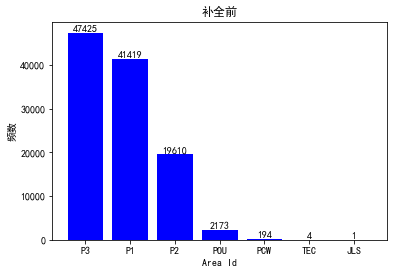

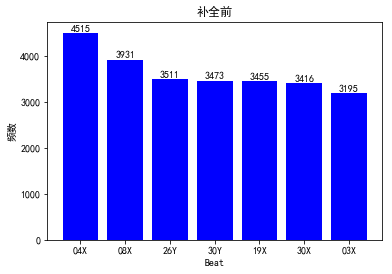

In [26]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data,cl,xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('补全前')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
draw(data, 3, 'Area Id')
draw(data, 4, 'Beat')


#4数据缺失的处理
#4.1剔除缺失值
将存在缺失值的行进行剔除，结果如下所示，剔除后仅剩余39241行，说明有大量的数据行中存在缺失值。
剔除缺失值后，以属性Area Id的频数的直方图为例，与补全前的相比，可以看到，各个值的频数都有所降低。

剔除后总数据量：110247


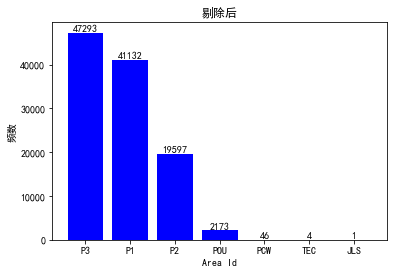

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data,cl,xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('剔除后')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()
data = pd.read_csv(path, header=0,  engine='python', encoding='utf-8')
data_drop = data.dropna()  # 将缺失值所在行剔除
print('剔除后总数据量：'+str(data_drop.shape[0]))
draw(data_drop,3,'Area Id')

##4.2最高频率值填补
对于存在缺失值的属性，使用该属性中频率最高的值进行填补。
该数据集中共有10个属性，首先确定每个属性的频率最高的值。读取数据集，遍历数据集的每个属性，根据属性的值的频数进行排序，最大频数即为最大频率，在遍历过程中，如果频数最高的值为缺失值，那么取下一个频数最高的值。最终将10个属性的最高频率的值存储在列表中。
接下来将每个属性的缺失值替换为该属性频率最高的值。
补全后以Area Id属性为例可以看到，有效行数为150930行，和数据集中的总行数相同。
以最高频率值填补后，以属性Area Id的频数最大的前7项的直方图为例，可以看到，值为P3的频数增加，其他值的频数不变，因为该属性只有一个缺失值。

                   5
count  110828.000000
mean        1.778440
std         0.415298
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


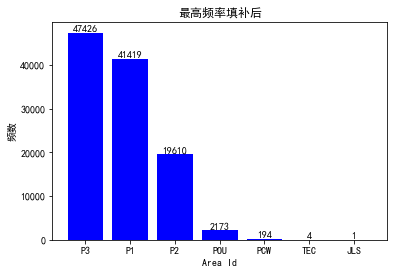

In [43]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/xue/Desktop/课程_研一下/数据挖掘/课后作业/4/oakland-crime-statistics-2011-to-2016/records-for-2016.csv'

def draw(data, cl, xlabel):
    num = 7
    data = data.values
    counter = Counter(data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('最高频率填补后')
    plt.xlabel(xlabel)
    plt.ylabel('频数')
    plt.show()

    
data = pd.read_csv(path, header=0, engine='python', encoding='utf-8')
data = data.values
max_time = []  # 每个属性最大频数的值
# 确定每个属性最大频数的值
for cl in range(data.shape[1]):
    counter = Counter(data[:, cl])
    counter = counter.most_common()  # 排序，返回类型为list，list的每个元素为内容和频数
    if counter[0][0] == counter[0][0]:  # 如果最大频数不为空值
        max_time.append(counter[0][0])
    else:  # 如果最大频数为空值
        max_time.append(counter[1][0])
# 对每个属性的空值进行替换
data_max = pd.DataFrame(data)
for cl in range(data.shape[1]):
    data_max[cl] = data_max[cl].fillna(max_time[cl])
print(data_max.describe())
draw(data_max,3,'Area Id')

##4.3通过属性的相关关系来填补缺失值
与2.3节中的内容相同，只是读取的文件名称为records-for-2016.csv。

##4.4通过数据对象之间的相似性来填补缺失值
与2.4节中的内容相同，只是读取的文件名称为records-for-2016.csv。